In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

In [14]:
data = pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [15]:
print(data.shape)

(1453, 15)


In [16]:
print(data.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [17]:
MD_x = np.array(data.iloc[:, 0:11])
MD_x = (MD_x == "Yes").astype(int)
np.round(np.mean(MD_x, axis=0), 2)

array([0.6, 0.9, 0.1, 0.9, 0.5, 0.9, 0.6, 0.6, 0.4, 0.2, 0.2])

In [18]:
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Access summary statistics
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()
components = pca.components_
singular_values = pca.singular_values_

# Print summary statistics
print("Explained Variance Ratio:", explained_variance_ratio )
print("\nCumulative Variance Ratio:", cumulative_variance_ratio)
print("\nPrincipal Components:", components)
num_digits = 1

# Print the PCA results with the specified number of digits
np.set_printoptions(precision=1, suppress=True)

# Print the PCA results
print("PCA Results:")
print(pca.components_)

Explained Variance Ratio: [0.3 0.2 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]

Cumulative Variance Ratio: [0.3 0.5 0.6 0.7 0.8 0.8 0.9 0.9 0.9 1.  1. ]

Principal Components: [[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]
PCA Results:
[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.

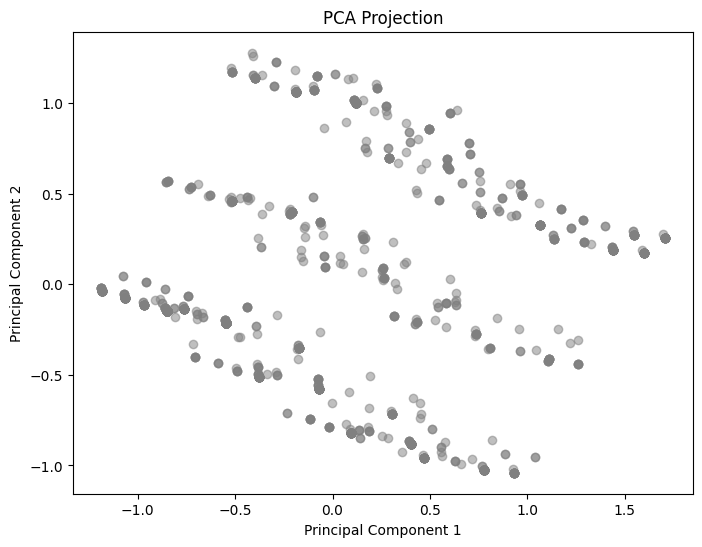

In [19]:

plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c='grey', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.show()

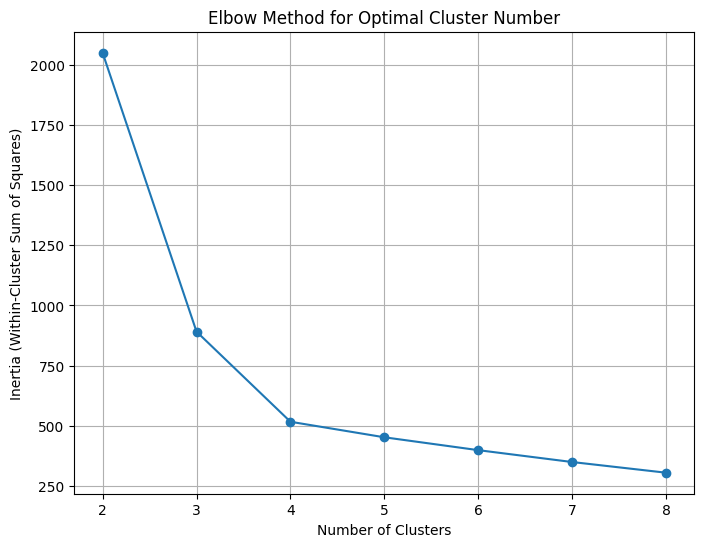

In [20]:
np.random.seed(1234)
n_samples = 300
n_features = 2
X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=4)

inertia = []
labels_list = []

# Perform K-Means clustering for different numbers of clusters (2 to 8)
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, random_state=1234, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    labels_list.append(kmeans.labels_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Cluster Number')
plt.grid(True)
plt.show()

n_clusters = 4
cluster_labels = labels_list[n_clusters - 2]


In [23]:
like_counts = data['Like'].value_counts()
like_counts = like_counts[::-1]
print(like_counts)

-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: Like, dtype: int64


In [24]:
data['Like.n'] = 6 - pd.to_numeric(data['Like'], errors='coerce')
value_counts = data['Like.n'].value_counts()
print(value_counts)

3.0     229
4.0     187
6.0     169
2.0     160
5.0     152
9.0      73
10.0     71
8.0      59
7.0      58
Name: Like.n, dtype: int64
